# Classify X-ray image Pneumonia vs Normal

**Pneumonia diagnosis algorithm trained on chest-xray dataset**

Author: Alfonso D'Amelio


In [1]:
import tensorflow as tf
from urllib.request import urlretrieve
from os.path import isfile, isdir
#from tqdm import tqdm 
#import tarfile
import pickle
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.layers.advanced_activations import LeakyReLU 
from keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
import numpy as np
import cv2
from PIL import Image
import glob
from tqdm import tqdm

Using TensorFlow backend.


In [54]:
#generate an empty array  with length equal to the sum of normal and pneumonia xrays
npy=np.ndarray((1341+3875,64,64,3))

In [55]:
npy.shape

(5216, 64, 64, 3)

**Prepare Train**

In [57]:
normal_xray = []
array_normal_xray = []

cont=0
#import normal xray image 
for filename in tqdm(glob.glob('/Users/alfonsodamelio/Desktop/kaggle chest x-ray/chest_xray/train/NORMAL/*.jpeg')): #assuming gif
    im = cv2.imread(filename)
    normal_xray.append(im)
    #img=cv2.resize(im, (64,64))
    #image = np.asarray(img, dtype=np.float32) / 255
    #array_normal_xray.append(image)
    



100%|██████████| 1341/1341 [01:20<00:00, 16.73it/s]


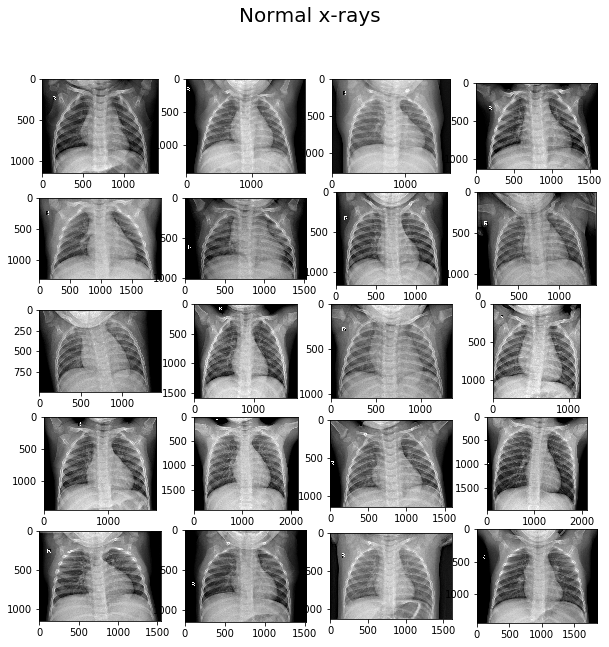

In [6]:
w=10
h=10
fig=plt.figure(figsize=(10, 10))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i)
    fig.suptitle('Normal x-rays', fontsize=20)
    plt.imshow(normal_xray[i])
    
plt.show()

In [58]:
#import pneumonia xray image 
from PIL import Image
import glob
pneu_xray = []
array_pneu_xray=[]
for filename in tqdm(glob.glob('/Users/alfonsodamelio/Desktop/kaggle chest x-ray/chest_xray/train/PNEUMONIA/*.jpeg')): #assuming gif
    im = cv2.imread(filename)
    pneu_xray.append(im)
    #img=cv2.resize(im, (64,64))
    #image = np.asarray(img, dtype=np.float32) / 255
    #array_pneu_xray.append(image)

100%|██████████| 3875/3875 [01:44<00:00, 31.44it/s]


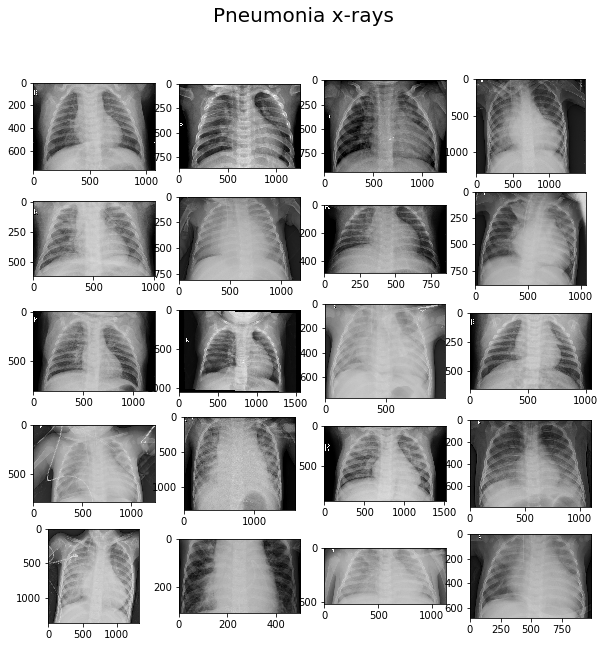

In [8]:
w=10
h=10
fig=plt.figure(figsize=(10, 10))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i)
    fig.suptitle('Pneumonia x-rays', fontsize=20)
    plt.imshow(pneu_xray[i])
    
plt.show()

In [59]:
#At this point we are able to create train set merging the to list image
train=normal_xray+pneu_xray
len(train)

5216

In [60]:
X_train=[]
for i in tqdm(train):
    #im = cv2.imread(i)
    img=cv2.resize(i, (64,64))
    image = np.asarray(img, dtype=np.float32) / 255
    X_train.append(image)

100%|██████████| 5216/5216 [01:33<00:00, 138.60it/s]


In [61]:
X_train=np.asarray(X_train)

In [62]:
X_train.shape

(5216, 64, 64, 3)

In [63]:
from itertools import repeat
normal=list(repeat(0, 1341))
pneu=list(repeat(1, 3875))
y_train=normal+pneu

In [64]:
y_train=np.asarray(y_train)
y_train

array([0, 0, 0, ..., 1, 1, 1])

In [65]:
enc = LabelEncoder()

# #### Font  encoder

encoder=enc.fit(y_train)
enc_transf=enc.transform(y_train)
y_train=np_utils.to_categorical(enc_transf)
y_train.shape

(5216, 2)

In [66]:
y_train[0]

array([1., 0.])

**Prepare Validation**

**Do the same stuffs for the validation set**

In [67]:
from PIL import Image
import glob
valid_normal_xray = []
for filename in tqdm(glob.glob('/Users/alfonsodamelio/Desktop/kaggle chest x-ray/chest_xray/val/NORMAL/*.jpeg')): #assuming gif
    im = cv2.imread(filename)
    valid_normal_xray.append(im)

100%|██████████| 8/8 [00:00<00:00, 15.95it/s]


In [68]:
from PIL import Image
import glob
valid_pneu_xray = []
for filename in tqdm(glob.glob('/Users/alfonsodamelio/Desktop/kaggle chest x-ray/chest_xray/val/PNEUMONIA/*.jpeg')): #assuming gif
    im = cv2.imread(filename)
    valid_pneu_xray.append(im)

100%|██████████| 8/8 [00:00<00:00, 23.83it/s]


In [69]:
val_train=valid_normal_xray+valid_pneu_xray
X_train_val=[]
for i in tqdm(val_train):
    #im = cv2.imread(i)
    img=cv2.resize(i, (64,64))
    image = np.asarray(img, dtype=np.float32) / 255
    X_train_val.append(image)

100%|██████████| 16/16 [00:00<00:00, 654.77it/s]


In [70]:
X_train_val=np.asarray(X_train_val)

In [71]:
X_train_val.shape

(16, 64, 64, 3)

In [72]:
from itertools import repeat
val_normal=list(repeat(0, 8))
val_pneu=list(repeat(1, 8))
y_train_val=val_normal+val_pneu
len(y_train_val)

16

In [73]:
y_train_val=np.asarray(y_train_val)
enc = LabelEncoder()

# #### Font  encoder

encoder=enc.fit(y_train_val)
enc_transf=enc.transform(y_train_val)
y_train_val=np_utils.to_categorical(enc_transf)
y_train_val.shape

(16, 2)

**Prepare Test**

**Do the same stuffs for the Test set**

In [74]:
from PIL import Image
import glob
test_normal_xray = []
for filename in tqdm(glob.glob('/Users/alfonsodamelio/Desktop/kaggle chest x-ray/chest_xray/test/NORMAL/*.jpeg')): #assuming gif
    im = cv2.imread(filename)
    test_normal_xray.append(im)


100%|██████████| 234/234 [00:18<00:00, 15.48it/s]


In [75]:
from PIL import Image
import glob
test_pneu_xray = []
for filename in tqdm(glob.glob('/Users/alfonsodamelio/Desktop/kaggle chest x-ray/chest_xray/test/PNEUMONIA/*.jpeg')): #assuming gif
    im = cv2.imread(filename)
    test_pneu_xray.append(im)


100%|██████████| 390/390 [00:09<00:00, 41.58it/s]


In [76]:
test_train=test_normal_xray+test_pneu_xray
X_train_test=[]
for i in tqdm(test_train):
    #im = cv2.imread(i)
    img=cv2.resize(i, (64,64))
    image = np.asarray(img, dtype=np.float32) / 255
    X_train_test.append(image)

X_train_test=np.asarray(X_train_test)

from itertools import repeat
test_normal=list(repeat(0, 234))
test_pneu=list(repeat(1, 390))
y_train_test=test_normal+test_pneu
len(y_train_test)

y_train_test=np.asarray(y_train_test)
enc = LabelEncoder()

# #### Font  encoder

encoder=enc.fit(y_train_test)
enc_transf=enc.transform(y_train_test)
y_train_test=np_utils.to_categorical(enc_transf)
y_train_test.shape

100%|██████████| 624/624 [00:01<00:00, 618.83it/s]


(624, 2)

**Now build up the model** $\rightarrow$ **CNN**

In [77]:
from keras import regularizers
from keras.callbacks import LearningRateScheduler
import numpy as np


batch_size = 64
num_classes = 10
epochs = 100



model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same',
                 input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))


model.add(Flatten())
model.add(Dense(2))
model.add(Activation('softmax'))

##### Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(X_train)

In [78]:
from keras.optimizers import RMSprop, Adam

rms = RMSprop(lr=0.001) #optimize 
custom_adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8) #optimize
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),\
                    steps_per_epoch=X_train.shape[0] // batch_size,epochs=2,\
                    verbose=1,validation_data=(X_train_val,y_train_val))

Epoch 1/2
81/81 [==============================] - 328s 4s/step - loss: 0.5468 - acc: 0.8741 - val_loss: 5.2217 - val_acc: 0.5000
Epoch 2/2
81/81 [==============================] - 268s 3s/step - loss: 0.3825 - acc: 0.8980 - val_loss: 2.1311 - val_acc: 0.5000


  **PREDICT ON TEST **

In [79]:
#testing
scores = model.evaluate(X_train_test, y_train_test, batch_size=128, verbose=1)
print('\nTest result: %.3f loss: %.3f' % (scores[1]*100,scores[0]))

624/624 [==============================] - 7s 11ms/step

Test result: 72.917 loss: 1.320


In [80]:
pred=model.predict(X_train_test)

+ Test accuracy result: 72.917 $\%$

+ Test loss: 1.320

**Let's visualize FP and FN with confusion matrix metrics**

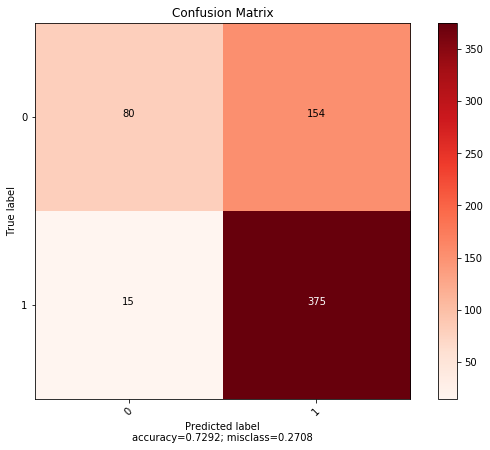

In [82]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.grid(b=False)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    
cm = confusion_matrix(np.argmax(y_train_test, axis = 1),np.argmax(pred, axis = 1))
plot_confusion_matrix(cm = cm,
                      normalize    = False,
                      cmap ='Reds',
                      target_names = ['0','1'],
                      title        = "Confusion Matrix")

**Prediction example**

55
[[0.9465839266777039, 0.05341605469584465]]
the predicted label is: Normal


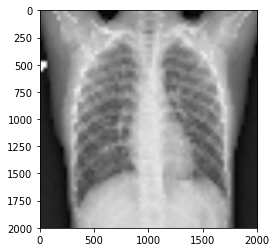

In [114]:
inp=int(input())
pred=model.predict(X_train_test[inp].reshape(1,64,64,3))

img=cv2.resize(X_train_test[inp,:,:,0], (2000,2000))
image = np.asarray(img, dtype=np.float32)/ 255
plt.imshow(image,"gray")

lista=pred.tolist()
print(lista)
sorted_label=[i for i in range(2)]
label_column=[] 
lista=lista[0]
index=lista.index(max(lista))
#label_column.append(sorted_label[index])
name=['Normal', 'Polmonite']
num=[i for i in range(2)]
dizio=dict(zip(num,name))
print("the predicted label is: "+str(dizio[sorted_label[index]]))